<a href="https://colab.research.google.com/github/casalazara/Machine-Learning-IELE/blob/master/Reto%203/Reto_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto #3 

---
*   Nicolás Francisco Abondano Velasco
*   Carlos Andrés Salazar Aroca




# Preparación

## Librerías a usar

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score,mean_squared_error

## Lectura de los datos

In [2]:
datos = pd.read_table('https://raw.githubusercontent.com/casalazara/Machine-Learning-IELE/master/Reto%203/msd_genre_dataset.txt',delimiter=',', skiprows=9)
datos


,%genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
0,classic pop and rock,TRFCOOU128F427AEC0,Blue Oyster Cult,Mes Dames Sarat,-8.697,155.007,1,9,1,246.33424,46.673067,14.613684,14.664215,0.176561,-9.346377,-12.341699,11.183382,7.405288,9.313765,3.201169,-0.152734,5.809709,14.930820,802.205948,1255.514569,580.030472,598.485223,575.337671,322.068603,321.726029,232.700609,186.805303,181.938688,151.508011
1,classic pop and rock,TRNJTPB128F427AE9F,Blue Oyster Cult,Screams,-10.659,148.462,1,4,0,189.80526,43.645377,-87.337150,41.051582,7.814770,-12.989848,-14.253599,6.126045,-2.448662,22.691713,-2.872706,1.427725,-6.710730,22.704843,1561.307072,2007.653070,1043.474073,585.694981,564.013736,510.177022,400.200186,365.119588,238.099708,197.933757,251.577525
2,classic pop and rock,TRLFJHA128F427AEEA,Blue Oyster Cult,Dance The Night Away,-13.494,112.909,1,10,0,158.19710,37.573538,-61.202030,28.760533,-13.788123,10.062347,-4.872030,-14.090243,5.580175,15.414011,4.556137,-1.877363,20.879475,58.459621,4644.001846,1204.856777,2736.520024,730.233239,665.203452,535.775111,439.335059,486.822970,265.333860,447.097987,251.880724
3,classic pop and rock,TRCQZAG128F427DB97,Blue Oyster Cult,Debbie Denise,-12.786,117.429,4,7,1,250.22649,42.566615,17.217897,53.484213,1.564362,-8.884632,-13.088890,-9.762620,1.373769,1.092876,1.479490,1.517015,8.562618,22.575460,691.140671,809.755802,563.908070,492.803819,378.382799,372.875044,231.941957,246.313305,168.400152,85.282462,339.897173
4,classic pop and rock,TRNXMNM128F427DB8C,Blue Oyster Cult,(Don't Fear) The Reaper,-14.093,141.536,4,9,0,307.06893,40.976507,-13.609779,39.566169,-5.602033,-17.754819,-21.833261,-5.600732,2.291770,3.526177,1.535449,2.763958,3.388757,34.294994,1062.180815,1093.684935,343.556047,889.163314,218.111796,304.862864,178.352161,440.478867,142.669283,81.061326,208.355152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59595,soul and reggae,TRGYRMA128E078FC55,Erykah Badu,Danger,-10.162,88.951,4,11,1,348.96934,40.231725,46.282408,-13.655822,5.946664,14.348422,-2.672532,5.951254,6.642360,6.464162,15.298649,-9.405466,2.804328,42.698623,3135.495359,4339.425990,4081.017023,1248.530483,1655.677367,1000.603204,650.139870,487.150838,503.846148,641.508417,395.121718
59596,soul and reggae,TRZZFQW128E078FC5A,Erykah Badu,Hollywood,-5.466,130.615,3,9,1,332.32934,43.813328,5.111750,-2.705070,-3.683494,2.478473,-3.406668,9.211850,3.222463,14.685264,3.570673,-7.111661,0.793817,52.380335,2852.962520,3759.486850,3703.892394,1413.063618,1375.104641,951.467238,621.927699,418.507034,409.707771,504.899788,350.913794
59597,soul and reggae,TRAMYBB128F424D86D,Erykah Badu,Think Twice,-9.494,88.976,4,3,1,182.04689,38.561170,21.603243,-43.954808,11.649718,-0.986997,-10.491520,-6.064987,-12.996223,8.259268,1.978779,1.043235,-2.172406,30.401080,2950.171909,4288.018243,3694.070826,1336.559501,1613.559675,1017.527699,1155.936991,422.885540,519.527734,538.895856,313.775934
59598,soul and reggae,TRABWFM128F424D86A,Erykah Badu / Dead Prez,The Grind,-7.617,67.929,3,0,1,169.42975,41.280131,8.233834,-41.325696,-1.864784,7.786002,0.071631,-14.726294,-6.791047,3.653238,11.307610,-5.241222,6.730477,32.521843,2362.093998,2846.537149,3655.514437,1811.926034,1705.581355,1024.020625,1052.533278,533.349475,591.853048,598.054091,443.893807


## Filas de interés
El reto es resolver el problema de clasificación binaria con ayuda de Scikit-Learn (jazz and blues) vs (soul and reggae) por lo que vamos a ver primero qué géneros hay en todo el dataset.

In [3]:
datos['%genre'].unique()

array(['classic pop and rock', 'punk', 'folk', 'pop',
       'dance and electronica', 'metal', 'jazz and blues', 'classical',
       'hip-hop', 'soul and reggae'], dtype=object)

Vemos que no tenemos que hacer una combinación de jazz y blues pues ya están combinados por lo que se procederá a dejar las filas que sean de estos dos géneros.

In [4]:
datos = datos[(datos['%genre']=='jazz and blues') | (datos['%genre']=='soul and reggae')]
datos

,%genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
48942,jazz and blues,TRJBLUX12903CE16EC,John Stevens,Mango,-18.996,89.147,1,0,1,256.86159,34.738162,-50.948828,20.177101,15.139567,-25.836751,7.729854,-23.534951,-7.002408,9.661461,-0.752980,6.760097,17.112598,12.473302,1530.622764,1649.321047,1221.638146,501.717892,1091.743641,618.560018,402.236969,309.392602,233.206167,261.850703,240.834177
48943,jazz and blues,TRDPDLX12903CE16F2,John Stevens,Carnaval,-19.347,125.825,4,2,1,301.87057,34.033346,-39.733083,30.640298,19.646264,-45.231415,9.103613,-19.019581,1.119047,9.169450,3.999394,5.481075,10.958845,11.150600,1385.186042,1670.689893,1339.193474,889.918742,1148.824912,428.976969,306.187624,368.973940,227.275123,261.643570,332.356536
48944,jazz and blues,TRMWVBM128F42374DA,John Stevens,My Blue Heaven (Album Version),-9.472,121.707,4,2,1,158.85016,41.794197,-22.133118,3.518487,1.868059,13.542078,6.944006,15.406498,5.469637,4.822017,1.792601,-10.094489,-2.143374,41.497045,4513.995103,2640.398239,3070.791615,1347.758671,1499.491510,1015.076345,897.411739,608.034880,549.493210,481.149049,442.663136
48945,jazz and blues,TRMLIWL128F42374DE,John Stevens,Here_ There And Everywhere (Album Version),-14.406,83.012,5,0,1,181.26322,38.637530,-64.807191,-21.920418,-25.058971,-2.520459,-11.979187,-4.021518,-4.502840,1.350948,-6.206154,-2.557249,1.841054,26.279428,2304.536939,1187.644248,1311.170435,809.621938,612.699944,492.734025,525.801667,585.984445,278.578591,250.545027,348.842236
48946,jazz and blues,TRGFUVB128F42374E1,John Stevens,This Love (Album Version),-9.289,76.013,4,7,0,248.89424,43.089845,-27.351674,14.205832,-6.941388,21.278516,-9.627968,-6.894824,-2.730303,2.003291,-2.030266,-0.764775,1.769443,37.786419,3726.684916,1164.272074,1536.674490,1167.316436,580.604008,498.168561,607.747214,367.191519,403.532772,262.670577,272.634634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59595,soul and reggae,TRGYRMA128E078FC55,Erykah Badu,Danger,-10.162,88.951,4,11,1,348.96934,40.231725,46.282408,-13.655822,5.946664,14.348422,-2.672532,5.951254,6.642360,6.464162,15.298649,-9.405466,2.804328,42.698623,3135.495359,4339.425990,4081.017023,1248.530483,1655.677367,1000.603204,650.139870,487.150838,503.846148,641.508417,395.121718
59596,soul and reggae,TRZZFQW128E078FC5A,Erykah Badu,Hollywood,-5.466,130.615,3,9,1,332.32934,43.813328,5.111750,-2.705070,-3.683494,2.478473,-3.406668,9.211850,3.222463,14.685264,3.570673,-7.111661,0.793817,52.380335,2852.962520,3759.486850,3703.892394,1413.063618,1375.104641,951.467238,621.927699,418.507034,409.707771,504.899788,350.913794
59597,soul and reggae,TRAMYBB128F424D86D,Erykah Badu,Think Twice,-9.494,88.976,4,3,1,182.04689,38.561170,21.603243,-43.954808,11.649718,-0.986997,-10.491520,-6.064987,-12.996223,8.259268,1.978779,1.043235,-2.172406,30.401080,2950.171909,4288.018243,3694.070826,1336.559501,1613.559675,1017.527699,1155.936991,422.885540,519.527734,538.895856,313.775934
59598,soul and reggae,TRABWFM128F424D86A,Erykah Badu / Dead Prez,The Grind,-7.617,67.929,3,0,1,169.42975,41.280131,8.233834,-41.325696,-1.864784,7.786002,0.071631,-14.726294,-6.791047,3.653238,11.307610,-5.241222,6.730477,32.521843,2362.093998,2846.537149,3655.514437,1811.926034,1705.581355,1024.020625,1052.533278,533.349475,591.853048,598.054091,443.893807


Veamos cuantos valores hay por género musical

In [5]:
datos['%genre'].value_counts()

jazz and blues     4334
soul and reggae    4016
Name: %genre, dtype: int64

Podemos ver que el conjunto de datos está aproximadamente balanceado tal como dice en el enunciado.

## Variables de interés

In [6]:
datos.head()

,%genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
48942,jazz and blues,TRJBLUX12903CE16EC,John Stevens,Mango,-18.996,89.147,1,0,1,256.86159,34.738162,-50.948828,20.177101,15.139567,-25.836751,7.729854,-23.534951,-7.002408,9.661461,-0.752980,6.760097,17.112598,12.473302,1530.622764,1649.321047,1221.638146,501.717892,1091.743641,618.560018,402.236969,309.392602,233.206167,261.850703,240.834177
48943,jazz and blues,TRDPDLX12903CE16F2,John Stevens,Carnaval,-19.347,125.825,4,2,1,301.87057,34.033346,-39.733083,30.640298,19.646264,-45.231415,9.103613,-19.019581,1.119047,9.169450,3.999394,5.481075,10.958845,11.150600,1385.186042,1670.689893,1339.193474,889.918742,1148.824912,428.976969,306.187624,368.973940,227.275123,261.643570,332.356536
48944,jazz and blues,TRMWVBM128F42374DA,John Stevens,My Blue Heaven (Album Version),-9.472,121.707,4,2,1,158.85016,41.794197,-22.133118,3.518487,1.868059,13.542078,6.944006,15.406498,5.469637,4.822017,1.792601,-10.094489,-2.143374,41.497045,4513.995103,2640.398239,3070.791615,1347.758671,1499.491510,1015.076345,897.411739,608.034880,549.493210,481.149049,442.663136
48945,jazz and blues,TRMLIWL128F42374DE,John Stevens,Here_ There And Everywhere (Album Version),-14.406,83.012,5,0,1,181.26322,38.637530,-64.807191,-21.920418,-25.058971,-2.520459,-11.979187,-4.021518,-4.502840,1.350948,-6.206154,-2.557249,1.841054,26.279428,2304.536939,1187.644248,1311.170435,809.621938,612.699944,492.734025,525.801667,585.984445,278.578591,250.545027,348.842236
48946,jazz and blues,TRGFUVB128F42374E1,John Stevens,This Love (Album Version),-9.289,76.013,4,7,0,248.89424,43.089845,-27.351674,14.205832,-6.941388,21.278516,-9.627968,-6.894824,-2.730303,2.003291,-2.030266,-0.764775,1.769443,37.786419,3726.684916,1164.272074,1536.674490,1167.316436,580.604008,498.168561,607.747214,367.191519,403.532772,262.670577,272.634634


La primer variable a eliminar es artist_name pues de acuerdo al enunciado se debe ignorar, seguidamente se eliminarán las variables track_id pues es de alta cardinalidad (identifica a cada canción) y por esto mismo no aportaría nada al modelo, también el título pues también es de alta cardinalidad y, si bien es cierto que dos canciones pueden tener el mismo título, esto sucede pocas veces y aún así no aportaría al modelo.

In [7]:
datos.drop(['artist_name','title','track_id'],axis=1,inplace=True)
datos

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,%genre,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
48942,jazz and blues,-18.996,89.147,1,0,1,256.86159,34.738162,-50.948828,20.177101,15.139567,-25.836751,7.729854,-23.534951,-7.002408,9.661461,-0.752980,6.760097,17.112598,12.473302,1530.622764,1649.321047,1221.638146,501.717892,1091.743641,618.560018,402.236969,309.392602,233.206167,261.850703,240.834177
48943,jazz and blues,-19.347,125.825,4,2,1,301.87057,34.033346,-39.733083,30.640298,19.646264,-45.231415,9.103613,-19.019581,1.119047,9.169450,3.999394,5.481075,10.958845,11.150600,1385.186042,1670.689893,1339.193474,889.918742,1148.824912,428.976969,306.187624,368.973940,227.275123,261.643570,332.356536
48944,jazz and blues,-9.472,121.707,4,2,1,158.85016,41.794197,-22.133118,3.518487,1.868059,13.542078,6.944006,15.406498,5.469637,4.822017,1.792601,-10.094489,-2.143374,41.497045,4513.995103,2640.398239,3070.791615,1347.758671,1499.491510,1015.076345,897.411739,608.034880,549.493210,481.149049,442.663136
48945,jazz and blues,-14.406,83.012,5,0,1,181.26322,38.637530,-64.807191,-21.920418,-25.058971,-2.520459,-11.979187,-4.021518,-4.502840,1.350948,-6.206154,-2.557249,1.841054,26.279428,2304.536939,1187.644248,1311.170435,809.621938,612.699944,492.734025,525.801667,585.984445,278.578591,250.545027,348.842236
48946,jazz and blues,-9.289,76.013,4,7,0,248.89424,43.089845,-27.351674,14.205832,-6.941388,21.278516,-9.627968,-6.894824,-2.730303,2.003291,-2.030266,-0.764775,1.769443,37.786419,3726.684916,1164.272074,1536.674490,1167.316436,580.604008,498.168561,607.747214,367.191519,403.532772,262.670577,272.634634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59595,soul and reggae,-10.162,88.951,4,11,1,348.96934,40.231725,46.282408,-13.655822,5.946664,14.348422,-2.672532,5.951254,6.642360,6.464162,15.298649,-9.405466,2.804328,42.698623,3135.495359,4339.425990,4081.017023,1248.530483,1655.677367,1000.603204,650.139870,487.150838,503.846148,641.508417,395.121718
59596,soul and reggae,-5.466,130.615,3,9,1,332.32934,43.813328,5.111750,-2.705070,-3.683494,2.478473,-3.406668,9.211850,3.222463,14.685264,3.570673,-7.111661,0.793817,52.380335,2852.962520,3759.486850,3703.892394,1413.063618,1375.104641,951.467238,621.927699,418.507034,409.707771,504.899788,350.913794
59597,soul and reggae,-9.494,88.976,4,3,1,182.04689,38.561170,21.603243,-43.954808,11.649718,-0.986997,-10.491520,-6.064987,-12.996223,8.259268,1.978779,1.043235,-2.172406,30.401080,2950.171909,4288.018243,3694.070826,1336.559501,1613.559675,1017.527699,1155.936991,422.885540,519.527734,538.895856,313.775934
59598,soul and reggae,-7.617,67.929,3,0,1,169.42975,41.280131,8.233834,-41.325696,-1.864784,7.786002,0.071631,-14.726294,-6.791047,3.653238,11.307610,-5.241222,6.730477,32.521843,2362.093998,2846.537149,3655.514437,1811.926034,1705.581355,1024.020625,1052.533278,533.349475,591.853048,598.054091,443.893807


## Manejo de valores faltantes
Vemos que el conjunto de datos no presenta valores faltantes ni duplicados


In [8]:
def completitud(df):
  mis_val = df.isnull().sum()
  mis_val_percent = 100 * (1 - (df.isnull().sum()/len(df)))
  mis_val_percent.rename_axis('Variable',inplace=True)
  return mis_val_percent
completitud(datos)

Variable
%genre            100.0
loudness          100.0
tempo             100.0
time_signature    100.0
key               100.0
mode              100.0
duration          100.0
avg_timbre1       100.0
avg_timbre2       100.0
avg_timbre3       100.0
avg_timbre4       100.0
avg_timbre5       100.0
avg_timbre6       100.0
avg_timbre7       100.0
avg_timbre8       100.0
avg_timbre9       100.0
avg_timbre10      100.0
avg_timbre11      100.0
avg_timbre12      100.0
var_timbre1       100.0
var_timbre2       100.0
var_timbre3       100.0
var_timbre4       100.0
var_timbre5       100.0
var_timbre6       100.0
var_timbre7       100.0
var_timbre8       100.0
var_timbre9       100.0
var_timbre10      100.0
var_timbre11      100.0
var_timbre12      100.0
dtype: float64

## Transformación de la variable objetivo a binaria
Se realizará la transformación de la siguiente manera, si el género de la canción es _jazz and blues_ el valor de la variable %genre es 1, de lo contrario es 0 pues es de género _soul and reggae_

In [9]:
def binarizar(genero):
  if genero =="soul and reggae":
    return 0
  else:
    return 1

datos['%genre'] = datos['%genre'].apply(binarizar)
datos.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,%genre,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
48942,1,-18.996,89.147,1,0,1,256.86159,34.738162,-50.948828,20.177101,15.139567,-25.836751,7.729854,-23.534951,-7.002408,9.661461,-0.752980,6.760097,17.112598,12.473302,1530.622764,1649.321047,1221.638146,501.717892,1091.743641,618.560018,402.236969,309.392602,233.206167,261.850703,240.834177
48943,1,-19.347,125.825,4,2,1,301.87057,34.033346,-39.733083,30.640298,19.646264,-45.231415,9.103613,-19.019581,1.119047,9.169450,3.999394,5.481075,10.958845,11.150600,1385.186042,1670.689893,1339.193474,889.918742,1148.824912,428.976969,306.187624,368.973940,227.275123,261.643570,332.356536
48944,1,-9.472,121.707,4,2,1,158.85016,41.794197,-22.133118,3.518487,1.868059,13.542078,6.944006,15.406498,5.469637,4.822017,1.792601,-10.094489,-2.143374,41.497045,4513.995103,2640.398239,3070.791615,1347.758671,1499.491510,1015.076345,897.411739,608.034880,549.493210,481.149049,442.663136
48945,1,-14.406,83.012,5,0,1,181.26322,38.637530,-64.807191,-21.920418,-25.058971,-2.520459,-11.979187,-4.021518,-4.502840,1.350948,-6.206154,-2.557249,1.841054,26.279428,2304.536939,1187.644248,1311.170435,809.621938,612.699944,492.734025,525.801667,585.984445,278.578591,250.545027,348.842236
48946,1,-9.289,76.013,4,7,0,248.89424,43.089845,-27.351674,14.205832,-6.941388,21.278516,-9.627968,-6.894824,-2.730303,2.003291,-2.030266,-0.764775,1.769443,37.786419,3726.684916,1164.272074,1536.674490,1167.316436,580.604008,498.168561,607.747214,367.191519,403.532772,262.670577,272.634634


## Distribución de los valores en las variables

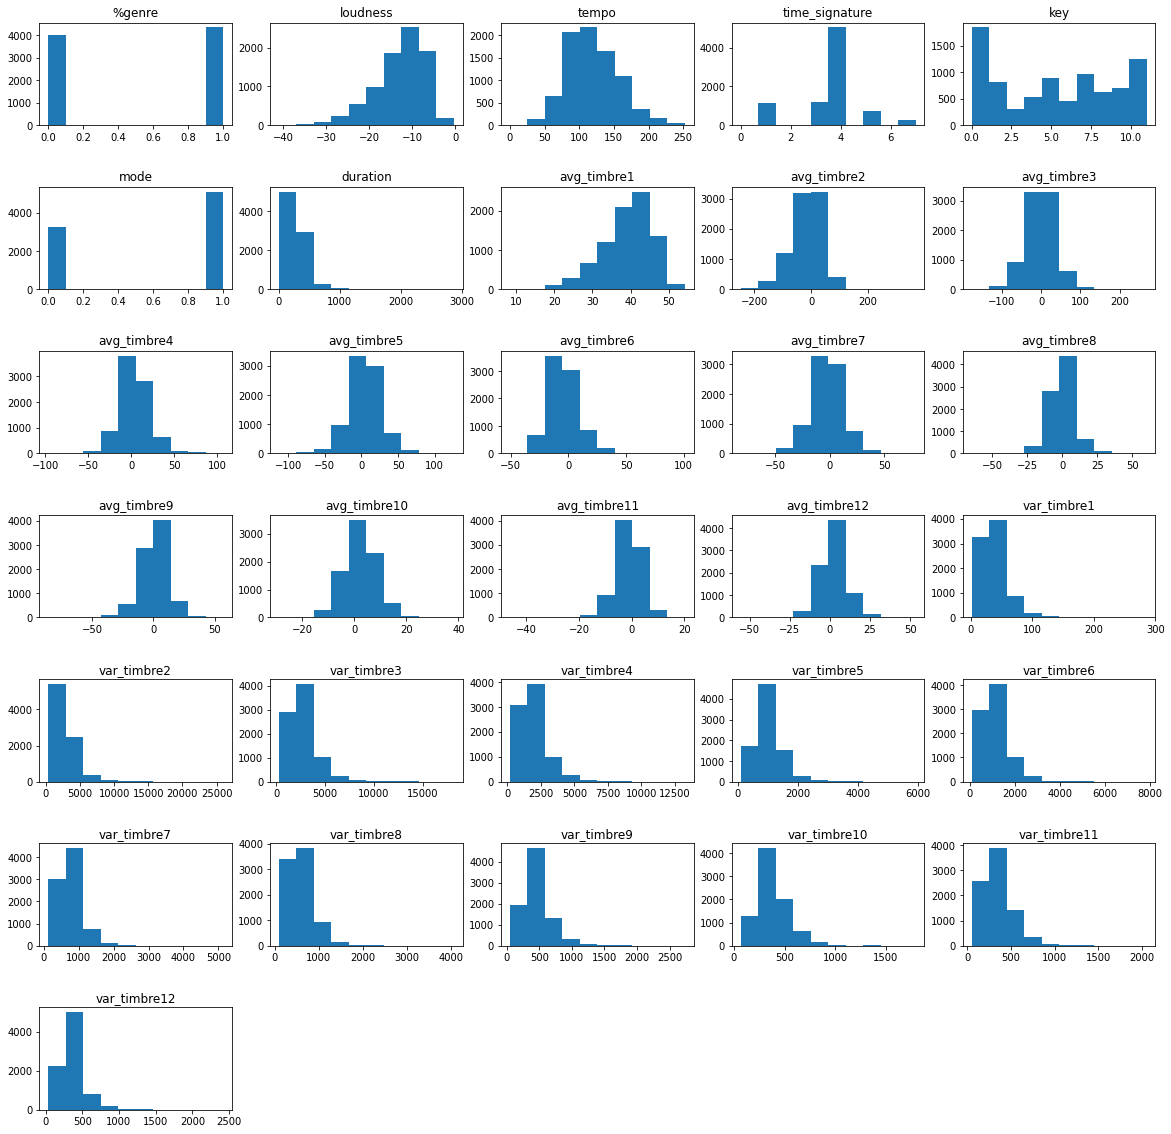

In [10]:
columnas = [columna for columna in datos.columns if datos[columna].dtype != "object"]
cols = 5
fig, axs = plt.subplots(len(columnas)//cols + 1, cols,figsize=(20,20) ) 
for i, columna in enumerate(columnas):
  axs[i//cols][i%cols].hist(datos[columna])
  axs[i//cols][i%cols].set_title(columna)
plt.subplots_adjust(hspace=.6)
for i in range(1,5):
  axs[6][i].set_visible(False)
plt.show()

Podemos ver que las variables están más o menos distribuidas de forma uniforme a través de un rango fijo.

## Escalamiento de las variables
Dada la distribución de las variables los datos son normalizados a un mismo rango usando MixMaxScaler (Escalamiento lineal). De esta forma el modelo convergerá más rápido a una solución y esta será más precisa pues los rangos para todas las variables serán los mismos.

In [11]:
scaler = MinMaxScaler()

cols = list(datos.columns)
datos = scaler.fit_transform(datos)
datos = pd.DataFrame(datos, columns=cols)
datos.describe()

,%genre,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
count,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000,8350.000000
mean,0.519042,0.694886,0.474925,0.517194,0.474328,0.611737,0.103537,0.669107,0.375644,0.394281,0.491312,0.490098,0.305535,0.494023,0.517295,0.607779,0.464539,0.679492,0.532456,0.129365,0.096022,0.139371,0.137926,0.159176,0.135691,0.129129,0.128430,0.156741,0.182180,0.150474,0.141523
std,0.499667,0.142336,0.146295,0.180770,0.323694,0.487384,0.056424,0.142115,0.088782,0.086617,0.085269,0.093016,0.085633,0.094433,0.070145,0.078238,0.092953,0.073364,0.076464,0.072511,0.062662,0.082955,0.082313,0.076651,0.075584,0.065216,0.072650,0.082554,0.091573,0.085173,0.076294
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.616708,0.368775,0.428571,0.181818,0.000000,0.072886,0.586706,0.324509,0.342559,0.439796,0.436255,0.247039,0.439412,0.477266,0.564565,0.404547,0.637258,0.486288,0.079960,0.055812,0.085623,0.083472,0.107810,0.083413,0.084855,0.079705,0.103171,0.119330,0.090499,0.097478
50%,1.000000,0.719541,0.460153,0.571429,0.454545,1.000000,0.090745,0.690680,0.387319,0.396777,0.487582,0.491364,0.298044,0.493917,0.517320,0.612578,0.463945,0.682076,0.532052,0.116264,0.080942,0.123091,0.119392,0.146348,0.121329,0.118629,0.112886,0.139476,0.165667,0.134260,0.125772
75%,1.000000,0.800761,0.568898,0.571429,0.727273,1.000000,0.119688,0.773755,0.435815,0.445412,0.538015,0.545243,0.353933,0.550413,0.558463,0.655290,0.525000,0.725161,0.576428,0.162971,0.119266,0.171512,0.171366,0.194361,0.171292,0.160129,0.161305,0.189098,0.228337,0.193092,0.164138
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
datos.head()

,%genre,loudness,tempo,time_signature,key,mode,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,avg_timbre9,avg_timbre10,avg_timbre11,avg_timbre12,var_timbre1,var_timbre2,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
0,1.0,0.540775,0.353277,0.142857,0.000000,1.0,0.088999,0.575350,0.318832,0.442692,0.549958,0.363029,0.385309,0.360767,0.462401,0.669684,0.419899,0.797934,0.666495,0.038407,0.047278,0.076034,0.079438,0.068968,0.128698,0.099308,0.077007,0.097205,0.095678,0.106249,0.086422
1,1.0,0.532164,0.498627,0.571429,0.181818,1.0,0.104668,0.560022,0.337049,0.466187,0.572080,0.281699,0.394378,0.389008,0.527240,0.666231,0.490502,0.778664,0.610157,0.033756,0.041603,0.077229,0.088441,0.135484,0.136040,0.061473,0.052752,0.119388,0.092242,0.106146,0.124834
2,1.0,0.774436,0.482308,0.571429,0.181818,1.0,0.054880,0.728804,0.365637,0.405286,0.484811,0.528162,0.380122,0.604321,0.561974,0.635719,0.457717,0.544002,0.490205,0.140484,0.163703,0.131462,0.221055,0.213932,0.181143,0.178442,0.202052,0.208392,0.278903,0.215859,0.171129
3,1.0,0.653386,0.328965,0.714286,0.000000,1.0,0.062682,0.660153,0.296322,0.348165,0.352631,0.460805,0.255204,0.482811,0.482357,0.611359,0.338884,0.657558,0.526683,0.086964,0.077480,0.050214,0.086295,0.121725,0.067083,0.074197,0.108210,0.200183,0.121962,0.100599,0.131753
4,1.0,0.778925,0.301229,0.571429,0.636364,0.0,0.086226,0.756982,0.357160,0.429284,0.441567,0.560604,0.270725,0.464840,0.496508,0.615937,0.400923,0.684564,0.526027,0.127434,0.132979,0.048907,0.103565,0.183014,0.062955,0.075282,0.128904,0.118724,0.194348,0.106659,0.099769


## Separación de los datos

### Separación de la variable objetivo de las demás variables

In [13]:
X = datos.drop('%genre',axis=1)
y = datos["%genre"]

### Separación del conjunto de validación y prueba de el de entrenamiento
Para el conjunto de validación y prueba se le asignará un tamaño del 20% del total de los datos (1670 datos), este conjunto será repartido posteriormente en partes iguales para cada uno, 10% del conjunto total de datos para el conjunto de prueba y 10% para el conjunto de validación.

In [14]:
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size = .2, random_state = 0)

X_train.shape, X_valtest.shape

((6680, 30), (1670, 30))

In [15]:
X_test, X_val, y_test, y_val = train_test_split(X_valtest, y_valtest, test_size = .5, random_state = 0)

X_test.shape, X_val.shape

((835, 30), (835, 30))

# Perceptrón multinivel de una capa

In [20]:
neuronas = []
errores = []
n_max = 32
for i in range(2,n_max+1):
  clf = MLPClassifier(activation="relu",solver='adam',hidden_layer_sizes=(i), learning_rate_init=0.001,random_state=1)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_val)
  error = mean_squared_error(y_val,y_pred)
  neuronas.append(i)
  errores.append(error)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Puntajes obtenidos


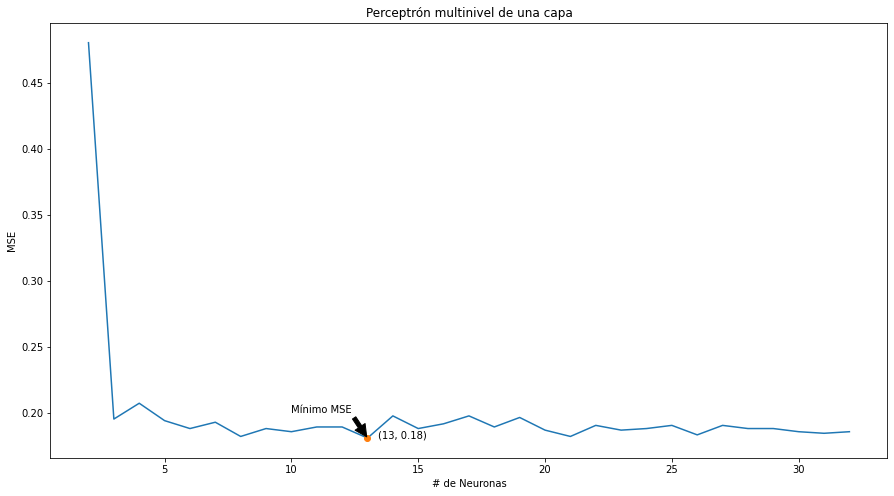

In [21]:
plt.figure(figsize=(15,8))
plt.plot(neuronas,errores)
min = np.argmin(errores)
plt.plot(neuronas[min],errores[min],'o')
plt.annotate("Mínimo MSE", (neuronas[min],errores[min]),xytext=(10, .2), arrowprops=dict(facecolor='black', shrink=0.05))
plt.text(neuronas[min]+.4,errores[min], '({}, {})'.format(neuronas[min],round(errores[min],2)))
ax = plt.gca()
ax.set_title("Perceptrón multinivel de una capa")
ax.set_xlabel("# de Neuronas")
ax.set_ylabel("MSE")
plt.show()

# Perceptrón multinivel de 2 o más capas

## Puntajes obtenidos